In [ ]:
import os
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

!pip install black[jupyter] --quiet

In [ ]:
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
!black "/content/drive/My Drive/Colab Notebooks/Sentiment-analysis.ipynb"

All done! ✨ 🍰 ✨
1 file left unchanged.


In [ ]:
root = "/content/drive/My Drive/Sentiment-analysis-project"
os.listdir(root)

['val.txt', 'test.txt', 'train.txt']

In [ ]:
def preprocess_text(text):
    text = re.sub(r"\W", " ", text)
    text = re.sub(r"\s+", " ", text)
    text = text.lower()

    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stopwords.words("english")]

    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return " ".join(tokens)

In [ ]:
tfidf = TfidfVectorizer(max_features=5000)

In [ ]:
def load_data(file_path, train=True):
    with open(os.path.join(root, file_path), "r") as file:
        sentences = []
        emotions = []

        for line in file:
            line = line.strip()
            if not line:
                continue

            sentence, emotion = line.split(";")

            sentences.append(sentence)
            emotions.append(emotion)

        df = pd.DataFrame({"text": sentences, "emotion": emotions})
        df["text"] = df["text"].apply(preprocess_text)

        if train:
            X = tfidf.fit_transform(df["text"]).toarray()
        else:
            X = tfidf.transform(df["text"]).toarray()
        y = df["emotion"]

        return X, y

In [ ]:
X_train, y_train = load_data("train.txt", True)
X_test, y_test = load_data("test.txt", False)
# X_val, y_val = load_data("val.txt", False)

In [ ]:
model = LogisticRegression(max_iter=4000)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Accuracy: 0.874
              precision    recall  f1-score   support

       anger       0.88      0.84      0.86       275
        fear       0.87      0.79      0.83       224
         joy       0.86      0.95      0.90       695
        love       0.84      0.64      0.73       159
     sadness       0.90      0.93      0.92       581
    surprise       0.94      0.52      0.67        66

    accuracy                           0.87      2000
   macro avg       0.88      0.78      0.82      2000
weighted avg       0.87      0.87      0.87      2000



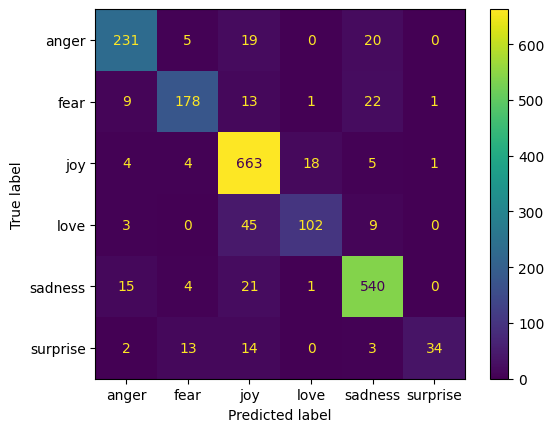

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

In [ ]:
def get_answer(text):
    text_tokens = preprocess_text(text)
    text_vector = tfidf.transform([text]).toarray()
    return model.predict(text_vector)[0]

In [ ]:
get_answer("Why is everything going wrong?")

'sadness'